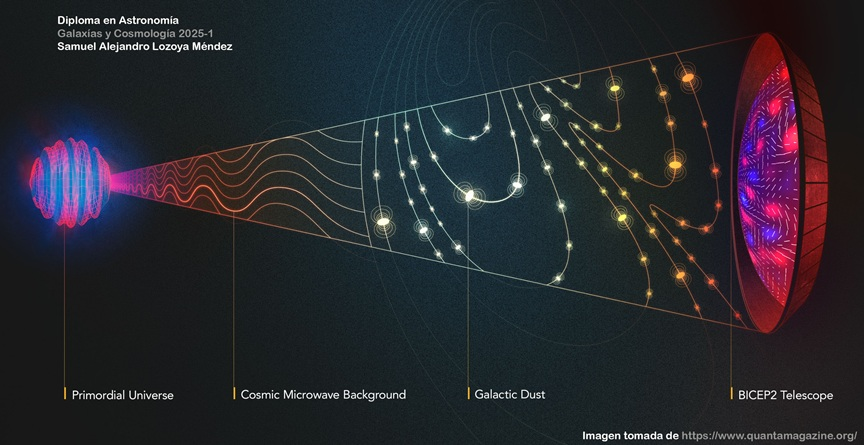

<a target="_blank" href="https://colab.research.google.com/drive/1A0SZ0vk4zrbe96PXsE4Y8xcAjVZ-HCnw#scrollTo=95704bea">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Reto ñoño 4 - Un mapa del tejido cósmico
###### *Tiempo de ejecución puede llegar a ≈30 minutos

### Datos de entrada


In [82]:
# Librerías a usar
import openpyxl, math
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Importar base de datos desde el archivo .xlsx
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path='/content/drive/MyDrive/Colab Notebooks/base-datos-galaxias-filtrada.xlsx'
excel_sheet = openpyxl.load_workbook(path)
database = excel_sheet.active

# Ciclo para iterar los valores de la tabla y tener acceso a ellos en cálculos posteriores
tabla = []
for row in range(1,100):
#for row in range(1,database.max_row):
    lista = [row,]
    for col in database.iter_cols(1,database.max_column):
        lista.append(col[row].value)
    tabla.append(lista)

Mounted at /content/drive


### Definiciones

In [83]:
# Constante de Hubble-Lemaitre (en años luz)
DH = 14000000000

# Creación de listas
distancias = []
ángulos_radianes= []


### Funciones

In [84]:
# Integral
def integrand(x):
  return 1/(math.sqrt((0.3*((1+x)**3))+0.7))

# Ciclo para calcular y llenar las listas de distancia y ángulo para todas las galaxias
for row in range(0,99):
#for row in range(0,database.max_row-1):
    # Cálculo de distancia
    z = tabla[row][4]
    asc_recta = tabla[row][2]
    I, err = quad(integrand, 0, z)
    distancia = DH*(1+z)*I
    distancias.append(distancia)

    # Conversión de ángulo a radianes
    radianes = (asc_recta*np.pi)/180
    ángulos_radianes.append(radianes)

### Resultados

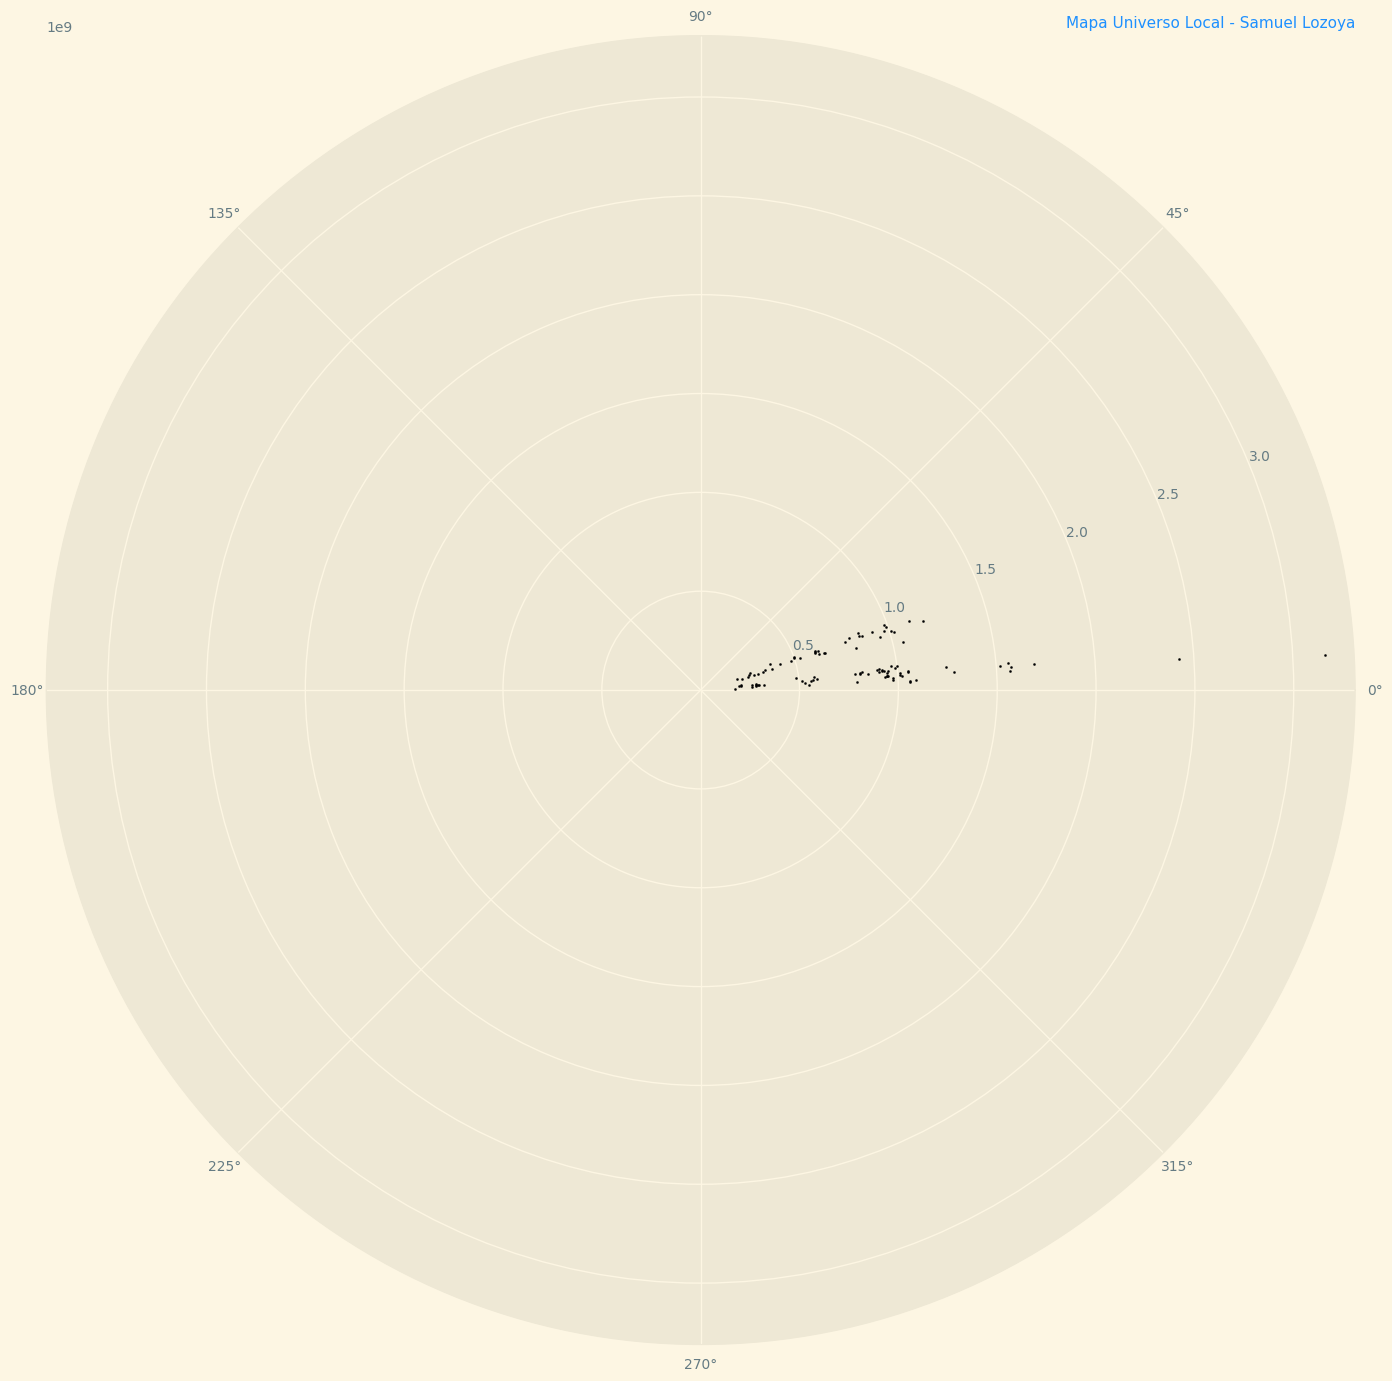

In [85]:
# Configuración de gráfica
plt.style.use("Solarize_Light2")
fig = plt.figure(figsize=(20,17))
ax = fig.add_subplot(111, projection='polar')
ax.scatter(ángulos_radianes, distancias,color ='#000000',linewidths=0.1,s=3)
ax.set_title('Mapa Universo Local - Samuel Lozoya', loc = 'right', fontsize=11, color = "dodgerblue")
ax.grid(True)
plt.show()